In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_original = pd.read_csv("données sans doublon.csv")
df = df_original[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [384]:
display(df["children"].describe())

display(df.groupby('children').children.count())

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [385]:
display(df["smoker"].describe())

display(df.groupby('smoker').smoker.count())

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

smoker
no     1063
yes     274
Name: smoker, dtype: int64

In [386]:
display(df["region"].describe())

display(df.groupby('region').region.count())

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object

region
northeast    324
northwest    324
southeast    364
southwest    325
Name: region, dtype: int64

In [387]:
display(df["charges"].describe())

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

___

### GROUP
___

In [388]:
df_group = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

df_group['group'] = np.where(df_group['charges'] < 4746.344000, '1', 
                             np.where(df_group['charges'] < 9386.161300, '2', 
                             np.where(df_group['charges'] < 16657.717450, '3', '4')))

___

### MAPPING
___

In [389]:
mapping_sex = {'male': 0, 'female': 1}
mapping_smoker = {'yes': 1, 'no': 0}

df['sex'] = df['sex'].map(mapping_sex)
df['smoker'] = df['smoker'].map(mapping_smoker)
df.loc[df['region'] == 'northeast', 'northeast'] = 1
df.loc[df['region'] == 'southeast', 'southeast'] = 1
df.loc[df['region'] == 'northwest', 'northwest'] = 1
df.loc[df['region'] == 'southwest', 'southwest'] = 1

# nettoyage
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'southeast', 'northwest', 'southwest', 'charges']]

display(df[:3])

,age,sex,bmi,children,smoker,northeast,southeast,northwest,southwest,charges
0,19,1,27.90,0,1,NaN,NaN,NaN,1.0,16884.9240
1,18,0,33.77,1,0,NaN,1.0,NaN,NaN,1725.5523
2,28,0,33.00,3,0,NaN,1.0,NaN,NaN,4449.4620


___

### création datasets
___

In [390]:
# df_age['group_age'] = df_age['group'] + '|' + df_age['age'].astype(str)

df_age = df_group[['age', 'charges']]
df_age = df_age.groupby(['age']).agg({'charges': 'mean'}).reset_index()

df_sex = df_group[['sex', 'group']]
df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex'].astype(str)
df_sex = df_sex[['group_sex']]
df_sex = df_sex.groupby(['group_sex']).agg({'group_sex': 'count'})
df_sex['group'] = df_sex.index
df_sex['sex'] = df_sex.index
df_sex['group'] = df_sex['group'].str[0]
df_sex['sex'] = df_sex['sex'].str[2:]
df_sex = df_sex.pivot_table(values='group_sex', index=['group'], columns='sex', aggfunc='sum').reset_index()

df_smoker = df_group[['smoker', 'group']]
df_smoker['group_smoker'] = df_smoker['group'] + '|' + df_smoker['smoker'].astype(str)
df_smoker = df_smoker[['group_smoker']]
df_smoker = df_smoker.groupby(['group_smoker']).agg({'group_smoker': 'count'})
df_smoker['group'] = df_smoker.index
df_smoker['smoker'] = df_smoker.index
df_smoker['group'] = df_smoker['group'].str[0]
df_smoker['smoker'] = df_smoker['smoker'].str[2:]
df_smoker = df_smoker.pivot_table(values='group_smoker', index=['group'], columns='smoker', aggfunc='sum').reset_index()
# df_smoker.fillna(0, inplace=True)

df_children = df_group[['children', 'group']]
df_children['group_children'] = df_children['group'] + '|' + df_children['children'].astype(str)
df_children = df_children[['group_children']]
df_children = df_children.groupby(['group_children']).agg({'group_children': 'count'})
df_children['group'] = df_children.index
df_children['children'] = df_children.index
df_children['group'] = df_children['group'].str[0]
df_children['children'] = df_children['children'].str[2:]
df_children = df_children.pivot_table(values='group_children', index=['group'], columns='children', aggfunc='sum').reset_index()

df_charges_by_children = df_group[['group', 'children']]
df_charges_by_children['group_children'] = df_charges_by_children['group'] + '|' + df_charges_by_children['children'].astype(str)
df_charges_by_children = df_charges_by_children[['group_children']]
df_charges_by_children = df_charges_by_children.groupby(['group_children']).agg({'group_children': 'count'})
df_charges_by_children['group'] = df_charges_by_children.index
df_charges_by_children['children'] = df_charges_by_children.index
df_charges_by_children['group'] = df_charges_by_children['group'].str[0]
df_charges_by_children['children'] = df_charges_by_children['children'].str[2:]
df_charges_by_children = df_charges_by_children.pivot_table(values='group_children', index=['children'], columns='group', aggfunc='sum').reset_index()
df_charges_by_children['P1'] = round((df_charges_by_children['1'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_charges_by_children['P2'] = round((df_charges_by_children['2'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_charges_by_children['P3'] = round((df_charges_by_children['3'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_charges_by_children['P4'] = round((df_charges_by_children['4'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)

df_children_no_children = df_group[['group', 'children']]
df_children_no_children['children'] = np.where(df_children_no_children['children'] > 0, 1, 0)
df_children_no_children['group_children'] = df_children_no_children['group'] + '|' + df_children_no_children['children'].astype(str)
df_children_no_children = df_children_no_children[['group_children']]
df_children_no_children = df_children_no_children.groupby(['group_children']).agg({'group_children': 'count'})
df_children_no_children['group'] = df_children_no_children.index
df_children_no_children['children'] = df_children_no_children.index
df_children_no_children['group'] = df_children_no_children['group'].str[0]
df_children_no_children['children'] = df_children_no_children['children'].str[2:]
df_children_no_children = df_children_no_children.pivot_table(values='group_children', index=['children'], columns='group', aggfunc='sum').reset_index()
df_children_no_children['P1'] = round((df_children_no_children['1'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_children_no_children['P2'] = round((df_children_no_children['2'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_children_no_children['P3'] = round((df_children_no_children['3'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_children_no_children['P4'] = round((df_children_no_children['4'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)

display(df_age[:3], df_sex, df_smoker, df_children, df_charges_by_children, df_children_no_children)

/tmp/ipykernel_56489/3643758714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex'].astype(str)
/tmp/ipykernel_56489/3643758714.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoker['group_smoker'] = df_smoker['group'] + '|' + df_smoker['smoker'].astype(str)
/tmp/ipykernel_56489/3643758714.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,age,charges
0,18,7086.217556
1,19,9868.929428
2,20,10159.697736


sex,group,female,male
0,1,160,174
1,2,170,164
2,3,185,149
3,4,147,188


smoker,group,no,yes
0,1,334.0,NaN
1,2,334.0,NaN
2,3,315.0,19.0
3,4,80.0,255.0


children,group,0,1,2,3,4,5
0,1,203,75,38,15,2,1
1,2,75,107,83,52,6,11
2,3,166,62,47,44,10,5
3,4,129,80,72,46,7,1


group,children,1,2,3,4,P1,P2,P3,P4
0,0,203,75,166,129,35.0,13.0,29.0,23.0
1,1,75,107,62,80,23.0,33.0,19.0,25.0
2,2,38,83,47,72,16.0,35.0,20.0,30.0
3,3,15,52,44,46,10.0,33.0,28.0,29.0
4,4,2,6,10,7,8.0,24.0,40.0,28.0
5,5,1,11,5,1,6.0,61.0,28.0,6.0


group,children,1,2,3,4,P1,P2,P3,P4
0,0,203,75,166,129,35.0,13.0,29.0,23.0
1,1,131,259,168,206,17.0,34.0,22.0,27.0


<Figure size 800x800 with 0 Axes>

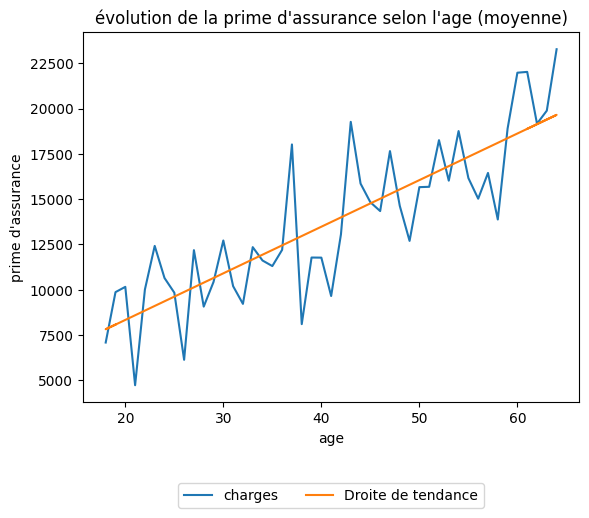

In [391]:
df_graph = pd.DataFrame(df_age)

# Création d'un graphique de lignes pour plusieurs séries de données
plt.figure(figsize=(8, 8))  # Définit la taille de la figure

df_graph.plot(x='age', y=['charges'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('age')
plt.ylabel("prime d'assurance")
plt.title("évolution de la prime d'assurance selon l'age (moyenne)")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['age'], df['charges'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['age'], tendance(df['age']), label='Droite de tendance')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

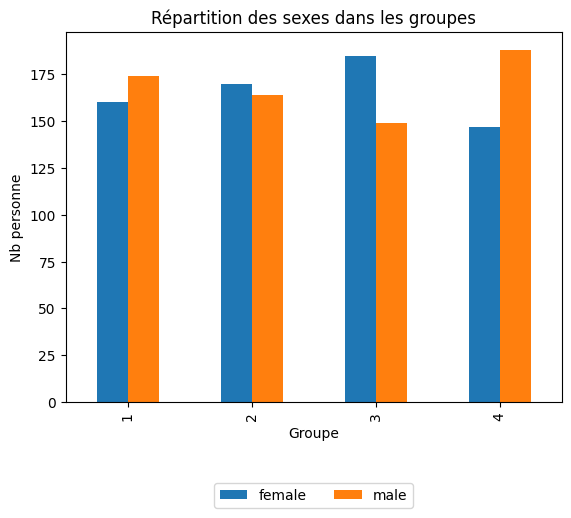

In [392]:
df_graph = pd.DataFrame(df_sex)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['female', 'male'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des sexes dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

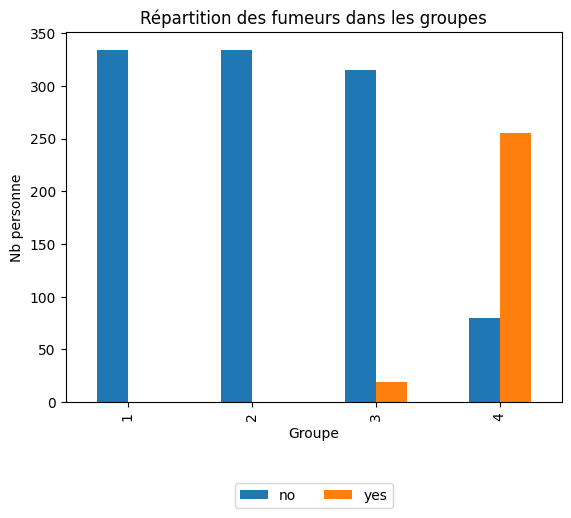

In [393]:
df_graph = pd.DataFrame(df_smoker)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['no', 'yes'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des fumeurs dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

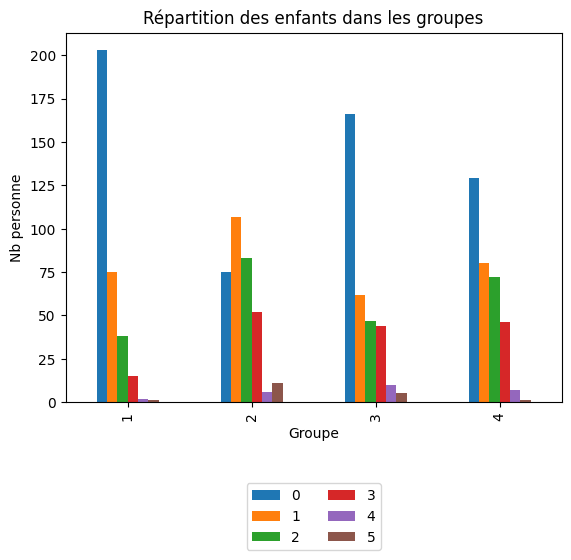

In [394]:
df_graph = pd.DataFrame(df_children)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['0', '1', '2', '3', '4', '5'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des enfants dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

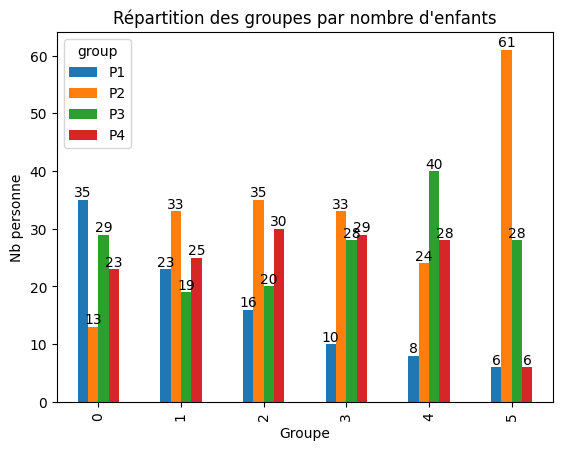

In [395]:
df_graph = pd.DataFrame(df_charges_by_children)

# Création d'un graphique à barres
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

# Tracer le graphique à barres
bars = df_graph.plot(x='children', y=['P1', 'P2', 'P3', 'P4'], kind='bar')

# Ajouter les labels et le titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title("Répartition des groupes par nombre d'enfants")

# Récupérer les hauteurs des barres pour placer les valeurs au-dessus
for container in bars.containers:
    plt.bar_label(container)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

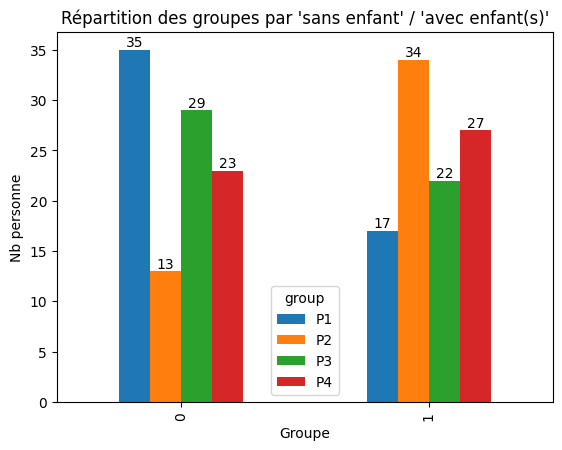

In [396]:
df_graph = pd.DataFrame(df_children_no_children)

# Création d'un graphique à barres
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

# Tracer le graphique à barres
bars = df_graph.plot(x='children', y=['P1', 'P2', 'P3', 'P4'], kind='bar')

# Ajouter les labels et le titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title("Répartition des groupes par 'sans enfant' / 'avec enfant(s)'")

# Récupérer les hauteurs des barres pour placer les valeurs au-dessus
for container in bars.containers:
    plt.bar_label(container)

# Afficher le graphique
plt.show()


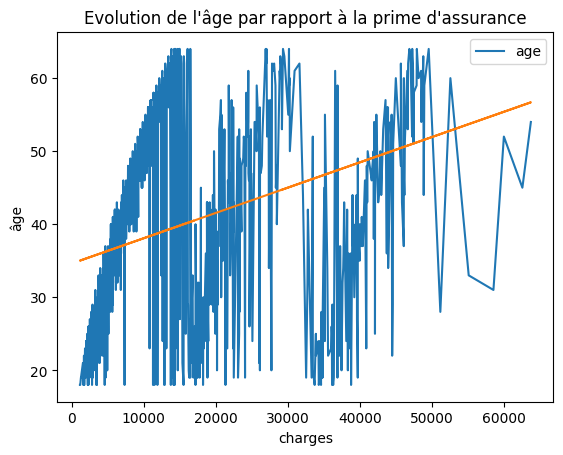

In [397]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['age'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('âge')
plt.title("Evolution de l'âge par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['age'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


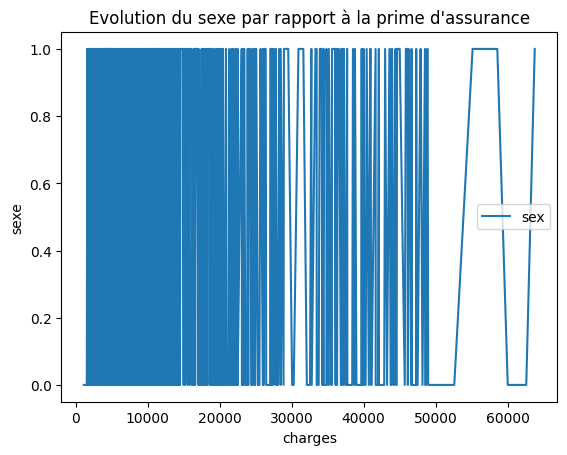

In [398]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['sex'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('sexe')
plt.title("Evolution du sexe par rapport à la prime d'assurance")

# Afficher le graphique
plt.show()


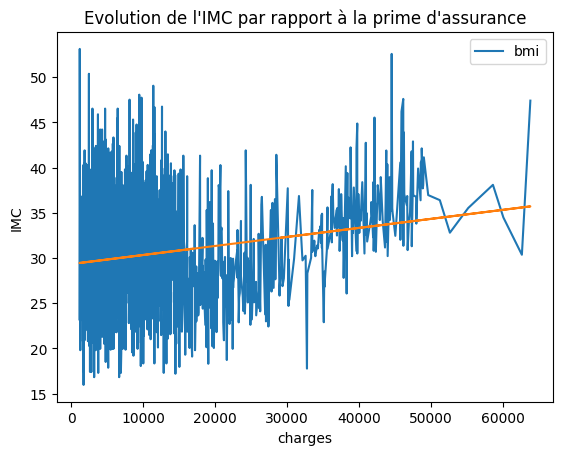

In [399]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['bmi'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('IMC')
plt.title("Evolution de l'IMC par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['bmi'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


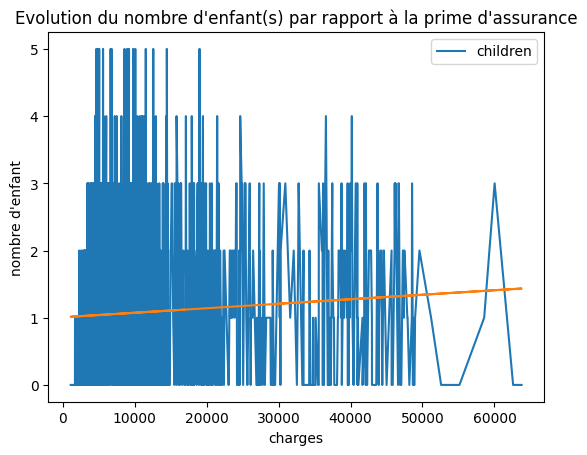

In [400]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['children'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel("nombre d'enfant")
plt.title("Evolution du nombre d'enfant(s) par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['children'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


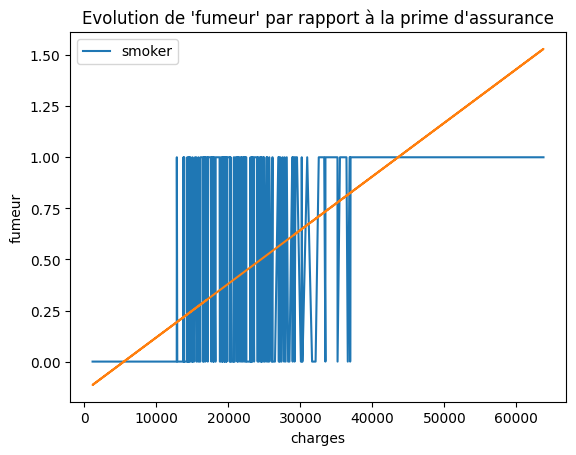

In [401]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['smoker'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('fumeur')
plt.title("Evolution de 'fumeur' par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['smoker'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()
